## Improved euler method

$$
u' = f(t,u)\quad 0<t\leq 1, \qquad u(0) = 1 
$$

with right hand side

$$
f(x,u) = -u+x^3+3 x^2
$$

with exact solution

$$
u(t) = e^{-t}+t^3
$$

### Set up

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Define the right hand side and exact solution

In [10]:
def f(x, u):
    return -u + x ** 3 + 3 * x ** 2

In [11]:
def u_exact(t):
    return np.exp(-t) + t ** 3

### Step1: Generate mesh

In [41]:
NT = 40
NP = NT + 1
h = 1.0/NT
t = np.zeros([NP, 1])
for n in range(NP):
    t[n] = n*h
print(t)

[[0.   ]
 [0.025]
 [0.05 ]
 [0.075]
 [0.1  ]
 [0.125]
 [0.15 ]
 [0.175]
 [0.2  ]
 [0.225]
 [0.25 ]
 [0.275]
 [0.3  ]
 [0.325]
 [0.35 ]
 [0.375]
 [0.4  ]
 [0.425]
 [0.45 ]
 [0.475]
 [0.5  ]
 [0.525]
 [0.55 ]
 [0.575]
 [0.6  ]
 [0.625]
 [0.65 ]
 [0.675]
 [0.7  ]
 [0.725]
 [0.75 ]
 [0.775]
 [0.8  ]
 [0.825]
 [0.85 ]
 [0.875]
 [0.9  ]
 [0.925]
 [0.95 ]
 [0.975]
 [1.   ]]


### Step2: Improved euler method

#### 使用迭代法求 $u_{n+1}$

In [42]:
def improved_euler(um, h, t):
    un, i= um, 0
    while i < 3:
        un = um + h / 2 * (f(t, um) + f(t + h, un))
        i += 1
    return un

In [43]:
uh = np.zeros([NP, 1], dtype=float)
uh[0] = 1.0
for n in range(NT):
    uh[n+1] = improved_euler(uh[n], h, t[n])
print(uh)

[[1.        ]
 [0.97533193]
 [0.95136709]
 [0.92818418]
 [0.90586227]
 [0.88448079]
 [0.86411953]
 [0.84485864]
 [0.82677856]
 [0.80996012]
 [0.79448441]
 [0.78043288]
 [0.76788725]
 [0.75692956]
 [0.74764212]
 [0.74010754]
 [0.73440869]
 [0.73062873]
 [0.72885105]
 [0.72915932]
 [0.73163745]
 [0.73636959]
 [0.74344015]
 [0.75293374]
 [0.76493521]
 [0.77952962]
 [0.79680226]
 [0.81683863]
 [0.83972441]
 [0.8655455 ]
 [0.89438799]
 [0.92633815]
 [0.96148246]
 [0.99990754]
 [1.04170022]
 [1.08694749]
 [1.1357365 ]
 [1.18815456]
 [1.24428917]
 [1.30422794]
 [1.36805866]]


In [45]:
u = np.zeros([NP, 1])
for n in range(NP):
    u[n] = u_exact(t[n])

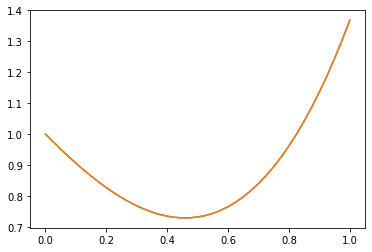

In [46]:
plt.plot(t, uh)
plt.plot(t, u)
plt.show()

In [47]:
err = max(np.abs(u-uh))
print(err)

[0.00017922]


$$NT=10,\qquad \max\limits_{n}|u[n]-uh[n]| = 0.00291099$$

$$NT=20,\quad \max\limits_{n}|u[n]-uh[n]| = 0.00072039$$

$$NT=40,\qquad \max\limits_{n}|u[n]-uh[n]| = 0.00017922$$

It is easy to see, as the number of points taken increases, the error between the approximate value and the exact value decreases.
